# Generating a Dataset

In [1]:
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
from src.config import google_trends_raw_data_path, google_trends_dataset_path
from src import utils
import matplotlib.dates as mdates


google_trends_raw_data_path

/home/rh/.local/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


'OUTPUT/data/google_trends_raw'

In [2]:
files = glob.glob(f'{google_trends_raw_data_path}/*csv')

In [3]:
for file in files[:3]:
    print(file)

OUTPUT/data/google_trends_raw/trends_3TVXtAsR1Inumwj472S9r4_2020-04-01.csv
OUTPUT/data/google_trends_raw/trends_7dGJo4pcD2V6oG8kP0tJRR_2020-04-01.csv
OUTPUT/data/google_trends_raw/trends_1zNqQNIdeOUZHb8zbZRFMX_2020-04-01.csv


Text(0.5, 1.0, 'Time-series of Google Trends Data for various artists')

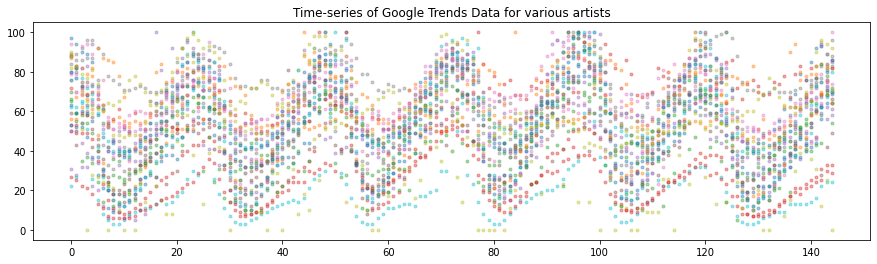

In [4]:
plt.figure(figsize=(15,4))
for file in files:
    df = pd.read_csv(file)
    plt.plot(df.trend, '.', alpha=0.39)
plt.title('Time-series of Google Trends Data for various artists')

# Concatenate the dataframes into one time-series dataframe

In [5]:
# Load the first dataframe
df = pd.read_csv(files[0])
display(df.head(2))

count = 0

# Label the samples of this first artist, and drop the trend column
df[f"sample{count}"] = df.trend
df.drop(columns='trend', inplace=True)
df = df.set_index('date')

# Loop the rest of the artists
for i in range(len(files[1:])):
        
    # Load a new dataframe, name their new columns, set the index
    count +=1
    new_data = pd.read_csv(files[i])
    new_data = new_data.set_index('date')
    new_data.columns = [f"sample{count}", f"isPartial{count}"]
    
    #all_data.index = pd.to_datetime(all_data.index)
    df = pd.concat((df, new_data), axis=1)

    #df = df.loc[:,~df.columns.duplicated()]
    #df = df.set_index('date')
print('Result')
display(df.head(2), df.shape)

,date,trend,isPartial
0,2020-04-01 00:00:00,97,False
1,2020-04-01 01:00:00,94,False


Result


,isPartial,sample0,sample1,isPartial1,sample2,isPartial2,sample3,isPartial3,sample4,isPartial4,...,sample26,isPartial26,sample27,isPartial27,sample28,isPartial28,sample29,isPartial29,sample30,isPartial30
date,,,,,,,,,,,,,,,,,,,,,
2020-04-01 00:00:00,False,97,97,False,87,False,66,False,53,False,...,59,False,94,False,76,False,82,False,62,False
2020-04-01 01:00:00,False,94,94,False,83,False,55,False,53,False,...,43,False,70,False,80,False,83,False,62,False


(145, 62)

In [6]:
print(f'This is all of our available data: {df.shape}')


This is all of our available data: (145, 62)


Vertical Stack

    all_data = pd.read_csv(files[0])
    for i in range(len(files[1:])):
        all_data = pd.concat((all_data, pd.read_csv(files[i])))

    all_data = all_data.set_index('date')
    all_data.index = pd.to_datetime(all_data.index)
    print(f'This is all of our available data: {all_data.shape}')
    display(all_data.head())
    display(all_data.describe())

In [7]:
df.index

Index(['2020-04-01 00:00:00', '2020-04-01 01:00:00', '2020-04-01 02:00:00',
       '2020-04-01 03:00:00', '2020-04-01 04:00:00', '2020-04-01 05:00:00',
       '2020-04-01 06:00:00', '2020-04-01 07:00:00', '2020-04-01 08:00:00',
       '2020-04-01 09:00:00',
       ...
       '2020-04-06 15:00:00', '2020-04-06 16:00:00', '2020-04-06 17:00:00',
       '2020-04-06 18:00:00', '2020-04-06 19:00:00', '2020-04-06 20:00:00',
       '2020-04-06 21:00:00', '2020-04-06 22:00:00', '2020-04-06 23:00:00',
       '2020-04-07 00:00:00'],
      dtype='object', name='date', length=145)

# Now that we have a datetime index, we can plot again our data

Be careful as we should not have a lot of white space within out x axis, or work with different weeks.


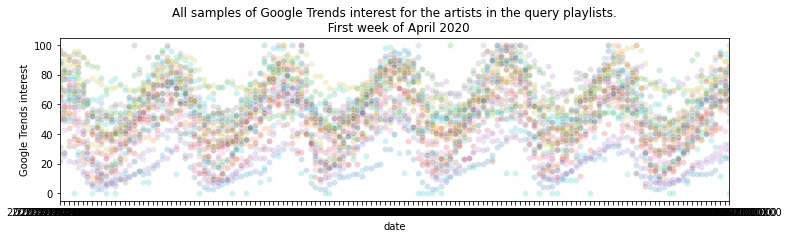

In [8]:
plt.figure(figsize=(12,3))
for column in df.columns:
    if df[column].dtype == int: 
        ax = sns.scatterplot(df.index, df[column], alpha = 0.2)
ax.set_xlim(df.index.min(), df.index.max())
ax.set_ylabel('Google Trends interest')
ax.set_title('All samples of Google Trends interest for the artists in the query playlists.\n  First week of April 2020')
print('Be careful as we should not have a lot of white space within out x axis, or work with different weeks.')

# Checking if there is partial data

In [9]:
partial = []
for column in df.columns:
    if df[column].dtype == bool: 
        partial.append(df[column])
for e in partial:
    if sum(e) != 0: raise Exception('There is at least one time-series with partial data')
print('Done checking your data, it looks like it has no missing samples! ')

Done checking your data, it looks like it has no missing samples! 


# Output Clean Dataset

In [10]:
output = df.copy()
for column in df.columns:
    # If its a google trend value
    if df[column].dtype != int: 
        # Concatenate all
        output.drop(columns=column, inplace=True)    
output.columns = range(len(output.columns))
output.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
date,,,,,,,,,,,,,,,,,,,,,
2020-04-01 00:00:00,97,97,87,66,53,31,89,79,88,90,...,80,56,70,27,50,59,94,76,82,62
2020-04-01 01:00:00,94,94,83,55,53,28,82,79,86,82,...,82,56,59,25,50,43,70,80,83,62
2020-04-01 02:00:00,90,90,82,58,59,32,72,71,86,79,...,73,62,35,22,44,73,93,54,70,64
2020-04-01 03:00:00,89,89,79,58,58,32,68,73,87,77,...,68,69,37,21,39,63,94,60,65,62
2020-04-01 04:00:00,85,85,78,63,70,22,51,65,87,81,...,73,82,34,18,36,42,89,74,59,66


In [11]:
output.to_csv(f'{google_trends_dataset_path}/2020-04-01_2020-04-07.csv')
utils.makesound('rick')

# Graphing our dataset without any modifications

In [12]:
df=output.copy()
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
count,145.000000,145.000000,145.000000,145.000000,145.00000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,55.793103,55.793103,67.262069,53.089655,65.62069,44.068966,46.675862,66.779310,66.006897,69.848276,...,64.841379,62.703448,34.468966,23.503448,55.117241,43.006897,54.296552,53.827586,61.531034,47.296552
std,17.245731,17.245731,13.103764,12.998353,11.20644,22.970892,23.669273,12.337538,18.137399,18.506129,...,17.312357,13.976729,18.091609,13.072514,13.183799,14.778690,20.869011,17.905363,11.431593,24.011318
min,28.000000,28.000000,46.000000,30.000000,46.00000,5.000000,8.000000,47.000000,37.000000,42.000000,...,37.000000,35.000000,5.000000,6.000000,31.000000,16.000000,17.000000,21.000000,37.000000,12.000000
25%,42.000000,42.000000,55.000000,42.000000,56.00000,24.000000,24.000000,57.000000,48.000000,52.000000,...,47.000000,52.000000,20.000000,14.000000,46.000000,33.000000,37.000000,39.000000,53.000000,27.000000
50%,54.000000,54.000000,65.000000,52.000000,66.00000,41.000000,47.000000,65.000000,66.000000,69.000000,...,65.000000,62.000000,32.000000,22.000000,52.000000,41.000000,53.000000,52.000000,61.000000,45.000000
75%,67.000000,67.000000,79.000000,63.000000,73.00000,62.000000,65.000000,76.000000,83.000000,88.000000,...,81.000000,74.000000,45.000000,30.000000,62.000000,52.000000,72.000000,64.000000,67.000000,64.000000
max,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,94.000000,100.000000,100.000000,96.000000,100.000000,100.000000,100.000000,96.000000,100.000000


Text(0.5, 0, 'Google Trends Score')

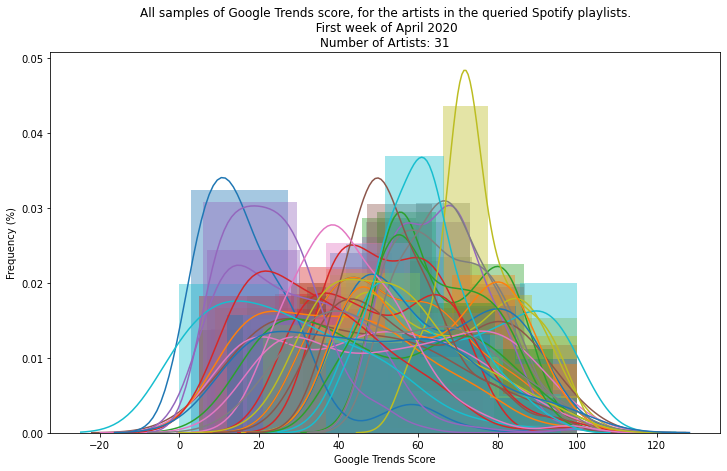

In [13]:
sample_len = len(df.columns)
fig, ax = plt.subplots(figsize=(12,7))
for artist in df.columns:
    sns.distplot(df[artist], bins = 4, kde=True)

ax.set_title(f'All samples of Google Trends score, for the artists in the queried Spotify playlists.\n  First week of April 2020 \nNumber of Artists: {sample_len}')    
ax.set_ylabel('Frequency (%)')
ax.set_xlabel('Google Trends Score')
